# Tutorial followed
- [Youtube-tutorial](https://www.youtube.com/watch?v=5xsyx-aNClM)
- [Qmunity blog post on Deutschs algorithm](https://www.qmunity.tech/tutorials/deutschs-algorithm)
- [Qiskit text book](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html)

In [6]:
from qiskit import *
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.visualization import plot_histogram

# load ibm account
# IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-07-31 00:01:22,337: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

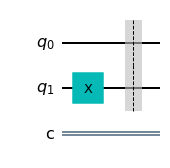

In [7]:
circuit = QuantumCircuit(2, 1)
circuit.x(1)
circuit.barrier()
circuit.draw('mpl')

# Build super postion of all possible inputs combination 00, 01, 10, 11

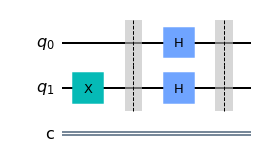

In [8]:
circuit.h(0)
circuit.h(1)
circuit.barrier()
circuit.draw(output='mpl')

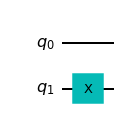

In [9]:
def Uf(func):
    uf = QuantumCircuit(2, name="Uf")
    if(func=="x"):
        uf.cx(0,1) # f(x) = x (done) # C-NOT GATE
    elif func=="!x":
        uf.x(0)
        uf.cx(0,1) # f(x) = !x  ?? # Z-CNOT
    elif func=="0":
        uf.i(1) # f(x) = 0 ?? # I gate
    elif func=="1":
        uf.x(1) # f(x) = 1 ?? # NOT gate 
    return uf
uf_circuit = Uf("x") # f(x) = !x
uf_circuit.draw(output="mpl")

# At this point we have the super position of possible inputs 00 , 01, 10, 11
# and also have Uf qunatum operation

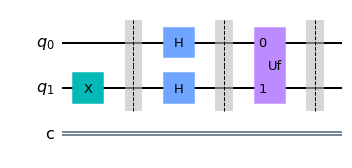

In [19]:
# add black box Uf in the circuit which include one of the 4 functions
circuit.append(uf_circuit, qargs=[0,1])
circuit.barrier()
circuit.draw(output='mpl')

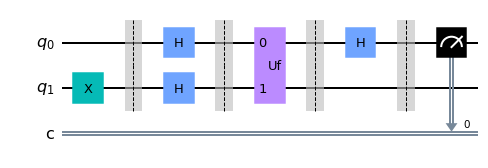

In [20]:
circuit.h(0)
circuit.barrier()
circuit.measure(0, 0) # qubit, cbit
#circuit.h(1)
circuit.draw(output='mpl')

# Run simulation to get the output
- Output will be 1 for balanced function.
- Output will be 0 for constanct function.

{'1': 1024}


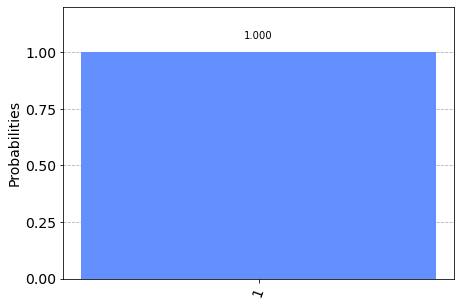

In [21]:
qasm_simulator = Aer.get_backend('qasm_simulator')
task = execute(circuit, backend=qasm_simulator, shots=1024)
result = task.result()
counts=result.get_counts(circuit)
print(counts)
plot_histogram(counts)

In [22]:
#provider = IBMQ. get_provider('ibm-q')
#provider.backends()
qcomp = provider.get_backend('ibmq_belem')
qcomp

NameError: name 'provider' is not defined

{'0': 1015, '1': 9}


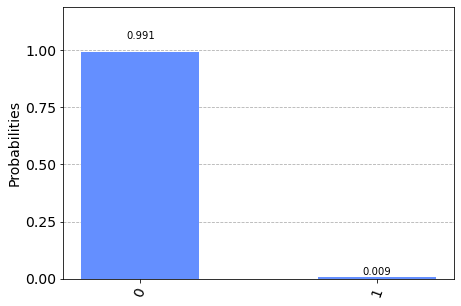

In [68]:
job = execute(circuit,backend=qcomp, shots=1024)
result= job.result()
counts=result.get_counts(circuit)
print(counts)
plot_histogram(counts)